In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.optimize import fsolve
from particle import Particle
import time
from scipy.linalg import eigh
from IPython.display import display, HTML

# Physical constants
fmto=10**(-15)
#mass = 9.109e-31   # Electron mass (kg)
c_speed = 2.998e+8
eV_to_J = 1.602e-19  # Conversion factor (eV to J)
eV_to_Kg= 1.7827e-36
MeV_to_Kg= 1.7827e-30

# Constants
hbar_c = 197.3  # MeV·fm, reduced Planck constant times speed of light
hbar = 1.054571817e-34

# X(3872) Wave Function

We want to obtain the X(3872) position space wave function, $\Psi(x)$. Our interest resides in its evanescent behaviour outside the potential due to the negative binding energy, $E_B$, of the state:

\begin{equation}
E_{B} = m_{X(3872)} - m_{D^0} - m_{D^{0*}} = -0.05~±~0.16~\text{MeV/c²} \\
\end{equation}
(using latest PDG masses).  

According to [1],   
interactions between $D^0D^{0*}$ at low energies are dominated by the S-wave channel and described using a single parameter, the S-wave scattering lenght $a$, given by 

\begin{equation}
a= \frac{\hbar c}{\sqrt{2 m_{red} E_B}} = 20.07 ± \text{fm},
\end{equation}

a value much larger than the natural scattering lenght, $1/m_{\pi} = 1.5 \text{fm}$ . Low-energy few-body observables for non-relativistic particles with short-range interactions and large scattering lenght have universal features insensitive to the details of the mechanism generating the large scattering lenght. This phenomenon is called low-energy universality.  

One key implication of low energy universality is the prediction of a universal wave function given by:

\begin{equation}
\Psi(r) = \frac{1}{r \sqrt{2\pi a}} e^{-r/a} 
\end{equation}

Since X(3872) quantum numbers have been determined to be $J^{PC}=1^{++}$ other hadronic states will contribute to the wavefunction. These include P-wave charmonium states $\chi_{c1}(1P)$ and $\chi_{c1}(2P)$, as well as $D^+D^{*-}/D^-D^{*+}$ states and $D^{0*}D^{0*}$. As the scattering length $a$ increases the probability for states other than $D^0D^{0*}$ decrease with $1/a$ and the wavefunction for $D^0D^{0*}$ approaches $\Psi(r)$ above. 

[1] https://arxiv.org/pdf/hep-ph/0311147

In [18]:
# PDG IDs for quarks
pdg_id_Qc = 4          # PDG ID for charm

# PDG IDs for the mesons
pdg_id_D0 = 421        # PDG ID for D^0
pdg_id_Dstar0 = 423    # PDG ID for D*0
pdg_id_pi0 = 111       # PDG ID for pi0

# Charm quark mass
Qc_mass = Particle.from_pdgid(pdg_id_Qc).mass

# pion mass (for the OPE potential)
pi0_mass = Particle.from_pdgid(pdg_id_pi0).mass

# Retrieve the particle information
#https://pdglive.lbl.gov/Particle.action?init=0&node=S032&home=MXXX035
particle_D0 = Particle.from_pdgid(pdg_id_D0)
D0_mass = particle_D0.mass
D0_mass_U = 0.05
#https://pdglive.lbl.gov/Particle.action?init=0&node=M061&home=MXXX035
particle_Dstar0 = Particle.from_pdgid(pdg_id_Dstar0)
D0star_mass= particle_Dstar0.mass
D0star_mass_U = 0.05

#X has no PDG id, even though it has a page there
#https://pdglive.lbl.gov/Particle.action?init=0&node=M176&home=MXXX025
X3872_mass = 3871.64
X3872_mass_U = 0.06

reducedsystemmass = round((D0_mass*D0star_mass)/(D0_mass+D0star_mass),3)
Binding_E_X3872 = [round(X3872_mass-(D0_mass+D0star_mass),3),X3872_mass_U+D0_mass_U+D0star_mass_U]

# Extract and print masses
print("mass in (MeV/c²)")
print("")
print(f"{particle_D0.name}:                {D0_mass} ± {D0_mass_U}")
print(f"{particle_Dstar0.name}:         {D0star_mass} ± {D0star_mass_U}")
print(f"reduced sistem:    {reducedsystemmass} ±\033[91m 0.036 \033[0m ") #need to double check this unc. value!
print(f"X(3872):           {X3872_mass} ± {X3872_mass_U} ")
print("")
print("Binding energy of X(3872) is: E =", Binding_E_X3872[0], f"± {Binding_E_X3872[1]} MeV/c²" )




# Scattering length calculation (in fm)
scattering_length = round(hbar_c / (2 * reducedsystemmass * abs(Binding_E_X3872[0]))**0.5,3)
print(f"S-Wave scattering length a = {scattering_length:.2f} ± fm")




mass in (MeV/c²)

D0:                1864.84 ± 0.05
D*(2007)0:         2006.85 ± 0.05
reduced sistem:    966.62 ± 0.036  
X(3872):           3871.64 ± 0.06 

Binding energy of X(3872) is: E = -0.05 ± 0.16 MeV/c²
S-Wave scattering length a = 20.07 ± fm


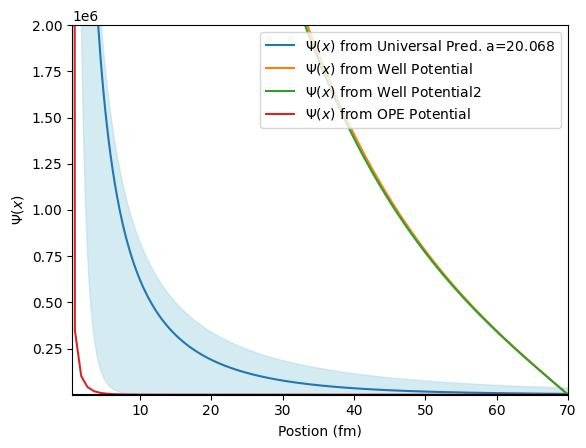

In [139]:
def UNI_wave_f(r, a=scattering_length*fmto):
    psi = (2*np.pi *a)**(-1/2) * np.exp(-r/a)/r
    normed_psi = psi / np.sqrt(scipy.integrate.simpson(abs(psi) ** 2, x=r))
    #print(scipy.integrate.simpson(abs(normed_psi) ** 2, x=r))
    return normed_psi

regionUNI=np.linspace(0.1, 70, 4000000)


plt.plot(regionUNI, UNI_wave_f(regionUNI*fmto),label=r"$\Psi(x)$ from Universal Pred. a="+str(scattering_length))
plt.fill_between(regionUNI, UNI_wave_f(regionUNI*fmto, 1.5*fmto ), UNI_wave_f(regionUNI*fmto, 50*fmto), color='lightblue', alpha=0.5)

    
plt.plot(space*fmto**(-1), Psi_Well[:,0], label=r"$\Psi(x)$ from Well Potential")
plt.plot(space*fmto**(-1), Psi_Well2[:,0], label=r"$\Psi(x)$ from Well Potential2 ")
plt.plot(space_W_X*fmto**(-1), Psi_W_X[:,0], label=r"$\Psi(x)$ from OPE Potential ")



plt.xlabel("Postion (fm)")
plt.ylabel(r"$\Psi(x)$")
plt.xlim(0.5,70)
plt.ylim(0.5, 2000000)
plt.axhline(y=0, color="black")
plt.legend()
plt.show()

# Numerical Aprouch
## Solving Schrodinger equation for any potential

Since we aim to describe bound states —which tend to exhibit spherical symmetry— it is more natural employ spherical coordinates. Hence, in position space, the Sch. equation reads:

\begin{align}
\hat{H}\,|{\Psi}\rangle \,=& \, E \,|{\Psi}\rangle \\
\Bigg\downarrow & \quad \text{position space}\,(r,\theta,\phi) \\
-\frac{\hbar^2}{2m} \Bigg[ \frac{\partial^2}{\partial r^2}\Psi + \frac{2}{r} \frac{\partial}{\partial r} \Psi + \frac{1}{ r^2 \text{sin$\,\theta$ }} \frac{\partial}{\partial\theta}&\Big( \text{sin$\,\theta$ } \frac{\partial}{\partial\theta}\Psi\Big) + \frac{1}{r^2 \text{sin$^2\,\theta$ }}\frac{\partial^2}{\partial\phi^2}\Psi \Bigg] + V\,\Psi = E \Psi
\end{align}

Assuming the potential depends only on the radius, $V=V(r)$, the wavefunction $\Psi(r,\theta,\phi)$, can be expressed as a product of a radial function $R(r)$ with an angular function, $Y_{l}^{m}(\theta,\phi)$, such that,
\begin{equation}
\Psi(r,\theta,\phi)=R(r)\,Y_{l}^{m}(\theta,\phi).
\end{equation}
In this scenario the angular part is well understood, being described by spherical harmonics. Moreover, it decouples from the radial part in the Schrödinger equation. Therefore, our focus is entirely on the radial Schrödinger equation. In order to solve it for an arbitrary central potential potential$^*$ $V(r)$, we employ the Finite Difference Method. This approach requires discretizing both the space and the differential operators living therein. Hence

\begin{align}
- \frac{\hbar^2}{2m} \Bigg(\frac{\partial^2}{\partial r^2} + \frac{2}{r}\frac{\partial}{\partial r} \Bigg) R(r) \, + & \, \Bigg( V(r) -\frac{\hbar^2 l(l+1)}{2m r^2} \Bigg) R(r) = E \, R(r) \\
\Bigg\downarrow & \quad \text{discretization}\\
-\frac{\hbar^2}{2m \Delta r^2} \Big(-R(r_{i+1}) - 2R(r_i) + R(r_{i-1})\Big) \, +& \, \Bigg(V(r_i) + \frac{\hbar^2 l(l+1)}{2m r_i^2} \Bigg) R(r_i) = E \, R(r_i).
\end{align}
where $\Delta x$ is the grid spacing and $i$ the $i$-th grid point. In this discrete form, the Hamiltonian is identified to be a matrix:
\begin{equation}
\text{Diagonal:} \quad \frac{\hbar^2}{m\, \Delta r^2} + V(r_i) + \frac{\hbar^2 l(l+1)}{2m r_i^2}, \quad \text{Off-diagonal:} \quad \pm\frac{\hbar^2}{2m \, \Delta r^2}.
\end{equation}
allowing to interpret Schrodinger equation as a matrix equation, and thus as an eigenvalue problem,
\begin{equation}
\begin{bmatrix}
\frac{\hbar^2}{m\Delta r^2} + V(r_1) + \frac{\hbar^2 l(l+1)}{2m r_1^2} & +\frac{\hbar^2}{2m\Delta r^2} & 0 & 0 & \cdots \\
-\frac{\hbar^2}{2m\Delta r^2} & \frac{\hbar^2}{m\Delta r^2} + V(r_2) + \frac{\hbar^2 l(l+1)}{2m r_2^2} & +\frac{\hbar^2}{2m\Delta r^2} & 0 & \cdots \\
0 & -\frac{\hbar^2}{2m\Delta r^2} & \frac{\hbar^2}{m\Delta r^2} + V(r_3) + \frac{\hbar^2 l(l+1)}{2m r_3^2} & +\frac{\hbar^2}{2m\Delta r^2} & \cdots \\
\vdots & \vdots & \vdots & \vdots & \ddots \\
\end{bmatrix} \,
\begin{bmatrix}
R(r_1) \\
R(r_2) \\
R(r_3) \\
\vdots \\
\vdots \\
\end{bmatrix} =E
\begin{bmatrix}
R(r_1) \\
R(r_2) \\
R(r_3) \\
\vdots \\
\vdots \\
\end{bmatrix}.
\end{equation}

where solving for the eigenvalues $E$ and eigenvectors $R(r)$ gives the allowed energy levels and wavefunctions.
For the discretization in cartesian coordinates see Apendix A at the end of this document.

*provided it is not too crazy!

In [4]:
#Potentials

def Well(W_depth, W_lenght, space_region, to_meter=1 ):
    #UNITS: meters & joules
    W_depth_J = W_depth * eV_to_J
    well_length_m = W_lenght * to_meter
    space_region_m = space_region * to_meter
    
    if W_depth_J < 0:    
        #binding potential
        V = np.where(np.abs(space_region_m) <= well_length_m / 2, W_depth_J, 0.0) 
    elif W_depth_J > 0:
        #repulsive potential
        V = np.where(np.abs(space_region_m) <= well_length_m / 2, 0.0, W_depth_J)
    
    return [space_region_m, V, space_region]


def TriangleS (T_depth, T_lenght, space_region, to_meter=1 ):
    v=0    
    v=abs(space_region)-abs(T_depth)        
    V=v * eV_to_J
    space_region_m = space_region * to_meter 

    V[((space_region>=-abs(T_lenght/2)) & (space_region<=abs(T_lenght/2)))==False ] =0
    #V[(space_region<=-abs(T_lenght)) & (space_region<=abs(T_lenght))]=0

    return [space_region_m, V, space_region]


def Harmonic(k, space_region, to_meter=1 ):
    k_j= k * eV_to_J / (to_meter**2)
    space_region_m=space_region*to_meter
    
    V = 0.5 * k_j * (space_region_m)**2
    
    return [space_region_m, V, space_region]


def Coulomb (q1, q2, space_region, to_meter=1 ):
    
    e_q = 1.602e-19
    eps0 = 8.854e-12   #(faradspermeter)
    space_region_m = space_region*to_meter
    
    V = (1/(4*np.pi*eps0*space_region_m))* (q1*e_q)*(q2*e_q) 
    
    return [space_region_m,V,space_region]


def Cornel (space_region, to_meter=1):
    Sigma = 4.56 #gev**2
    Kappa = (4/3)*0.47
    #space_region_m = space_region*to_meter
    V =-(Kappa/space_region)+space_region*Sigma
    
    return [space_region,V,space_region]

In [5]:
def Solve_Sch_Eq(m_par_MEV, Potential, Nstat=1, coord = "xyz", ell=0, plotit = 1, yl="", xl="", additionalSF= 1):
    start_time = time.time()
    
    mass = m_par_MEV * MeV_to_Kg
    x_meter = Potential[0]

    # Hamiltonian matrix
    #finite difference method
    N=len(Potential[1])
    H = np.zeros((N, N))
    dx = abs(Potential[0][0+1] - Potential[0][0])
    
    for i in range(N):
            
        if coord == "xyz":
            if i > 0:
                H[i, i-1] = -hbar**2 / (2 * mass * dx**2)
            if i < N - 1:
                H[i, i+1] = -hbar**2 / (2 * mass * dx**2)
            H[i, i] = hbar**2 / (mass * dx**2) + Potential[1][i]

        if coord == "RadiusThetaPhi":
            H[i, i] =  hbar**2 / (mass * dx**2) + Potential[1][i]
            H[i, i] += (ell * (ell + 1) * hbar**2) / (2 * mass * x_meter[i]**2)   # Centrifugal potential term
            if i > 0:
                H[i, i-1] = -hbar**2 / (2 * mass * dx**2) + hbar**2 / (2 * mass * x_meter[i] * dx)
            if i < N - 1:            
                H[i, i+1] = -hbar**2 / (2 * mass * dx**2) - hbar**2 / (2 * mass * x_meter[i] * dx)            


    # Solve the eigenvalue problem
    eigenvalues, eigenvectors = eigh(H)
    
    #Normalize the WF
    for i in range(len(eigenvectors)):
        eigenvectors[:, i] = eigenvectors[:, i] / np.sqrt(scipy.integrate.simpson(abs(eigenvectors[:, i]) ** 2, x=x_meter))

    # Convert eigenvalues from Joules to eV
    eigenvalues_eV = eigenvalues / eV_to_J 

    end_time = time.time()
    print(f"Time taken: {end_time - start_time:.6f} sec")
    
    # Plot the results
    if plotit == 1:
        plt.figure(figsize=(10, 6))

        # Plot the well interior shaded with light grey
        plt.fill_between(Potential[2], y1=0, y2=Potential[1] / eV_to_J, color='lightgrey', alpha=0.5)
        plt.plot(Potential[2], Potential[1] / eV_to_J, 'k--', label="V(x) (eV)")
        plt.axhline(y=0, color="black")

        # Plot wavefunctions and energy levels inside the well only
        
        for i in range(Nstat):
            color = plt.cm.tab10(i % 10)  # Cycle through a colormap for consistent coloring
            scaling_factor= 1 / (20 * (max(abs(eigenvectors[:, i]))/max(abs(Potential[1] / eV_to_J)) ))
            plt.plot(Potential[2], eigenvectors[:, i]*scaling_factor*additionalSF + eigenvalues_eV[i], label=f"n={i}, E={eigenvalues_eV[i]:.2f} eV", color=color)
            plt.axhline(eigenvalues_eV[i],xmin=0.05,xmax=0.9, linestyle=":",color=color)
        
        # Axis limits and labels
        plt.xlabel("Postion ()")
        plt.ylabel("V (eV)")
        if yl != "":
            plt.ylim(yl[0],yl[1])
        if xl != "":
            plt.xlim(xl[0],xl[1])
        plt.legend()
        plt.title("Energy Levels + WFs ")
        #plt.grid()
        plt.show()   
        
        return [eigenvalues, eigenvectors , Potential[0]]

Time taken: 235.233744 sec


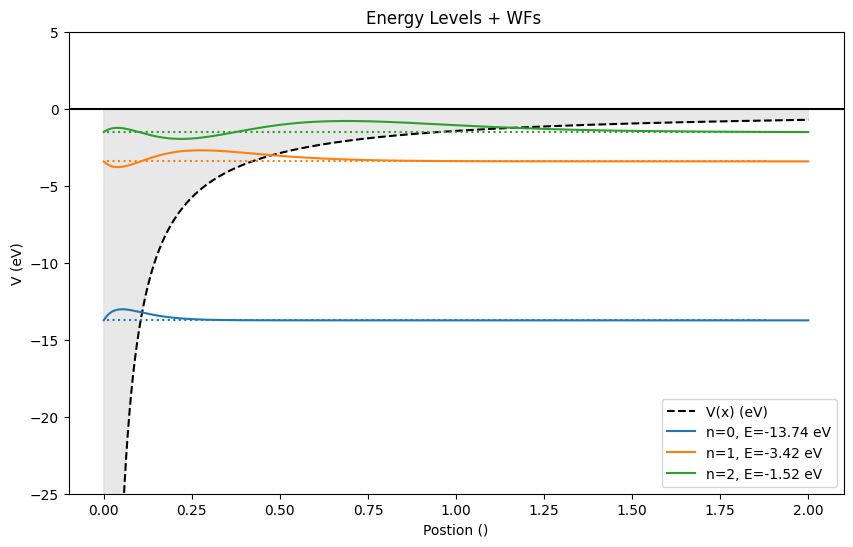

In [47]:
#Hydrogen Atom !!

region=np.linspace(0.00001, 2, 15000)
V_Coulomb=Coulomb(1, -1, region, to_meter=1e-9)
Energy, Psi, space = Solve_Sch_Eq(0.511, V_Coulomb, 3, yl=[-25,5], additionalSF= 0.0001 )


Time taken: 2620.084787 sec


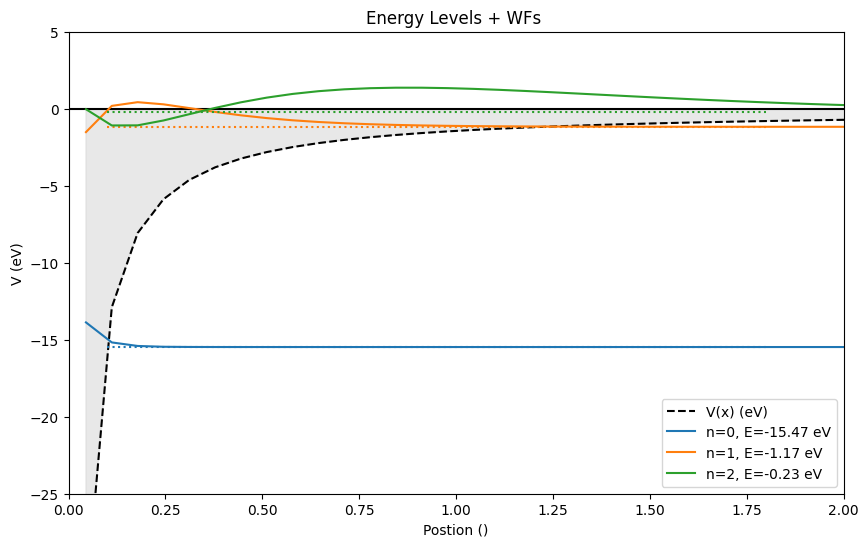

In [202]:
# In spherical coordinates R(r)

region_sph=np.linspace(0.045, 2000, 30000)
V_Coulomb=Coulomb(1, -1, region_sph, to_meter=1e-9)
Energy, Psi, space = Solve_Sch_Eq(m_red_ep, V_Coulomb, 3, coord = "RadiusThetaPhi",  yl=[-25,5],  xl=[0,2], ell=0)

Time taken: 29.891770 sec


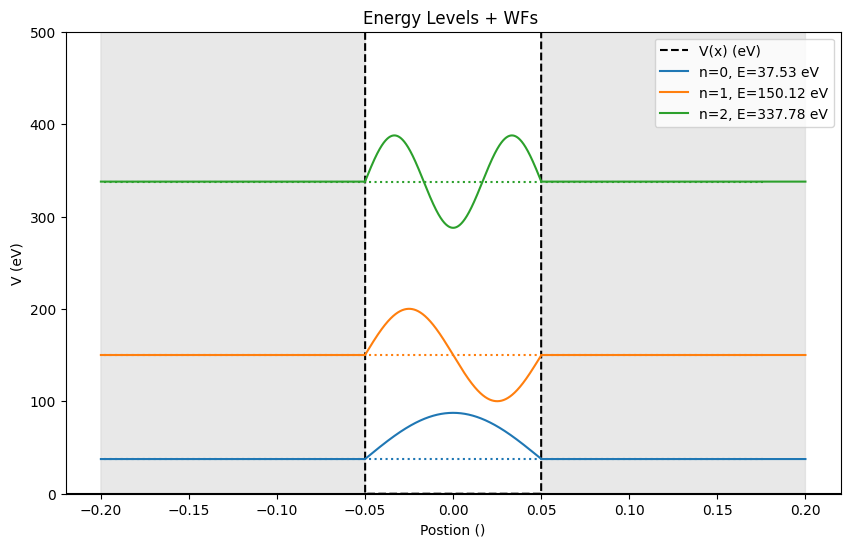

In [7]:
#Poço INfinto de potencial!

region=np.linspace(-0.2, 0.2, 5000)
V_Well=Well(9999999999999, 0.1, region, to_meter=1e-9)
Energy, Psi, space = Solve_Sch_Eq(0.511, V_Well, 3, yl=[0,500], additionalSF= 0.0000000001)

Time taken: 23.075396 sec


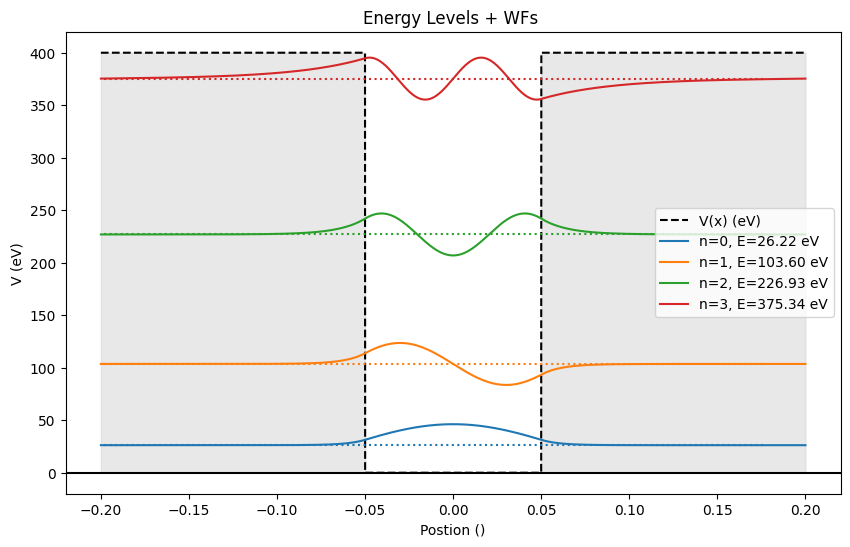

In [10]:
#Poço finito de potencial!
region=np.linspace(-0.2, 0.2, 5000)
V_Well=Well(400, 0.1, region, to_meter=1e-9)
Energy, Psi, space = Solve_Sch_Eq(0.511, V_Well, 4)

Time taken: 2.082575 sec


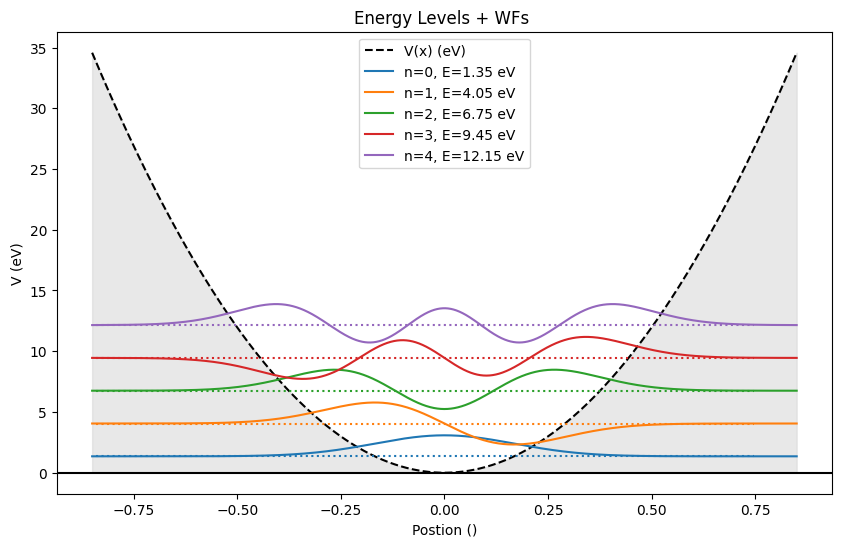

In [44]:
#Oscilador Harmónico!

region_H = np.linspace(-0.85, 0.85, 2500)
springK = 95.7
V_Harmonic = Harmonic(springK, region_H, to_meter=1e-9)
Energy, Psi, space = Solve_Sch_Eq(0.511,V_Harmonic,5)

Time taken: 11.118023 sec


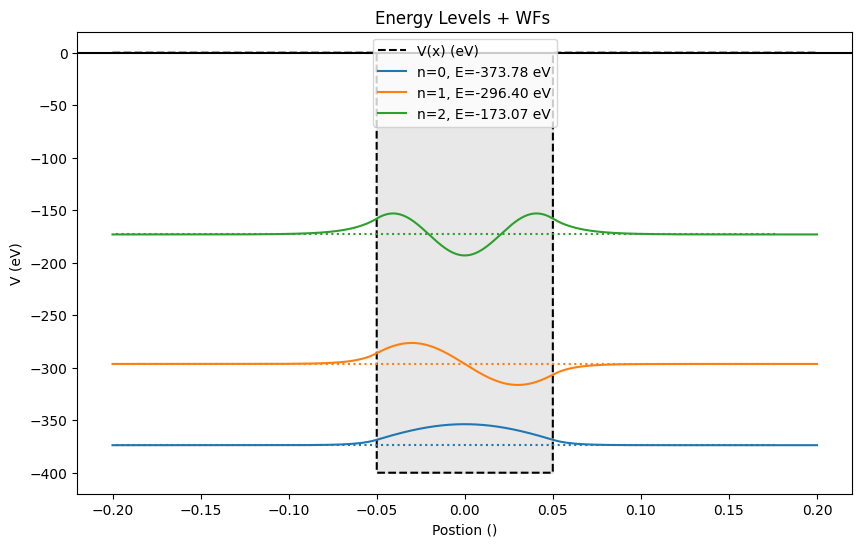

In [45]:
#Confining Potential (Well)

region=np.linspace(-0.2, 0.2, 5000)
V_Well=Well(-400, 0.1, region, to_meter=1e-9)
Energy, Psi, space = Solve_Sch_Eq(0.511, V_Well, 3)

Time taken: 9.986554 sec


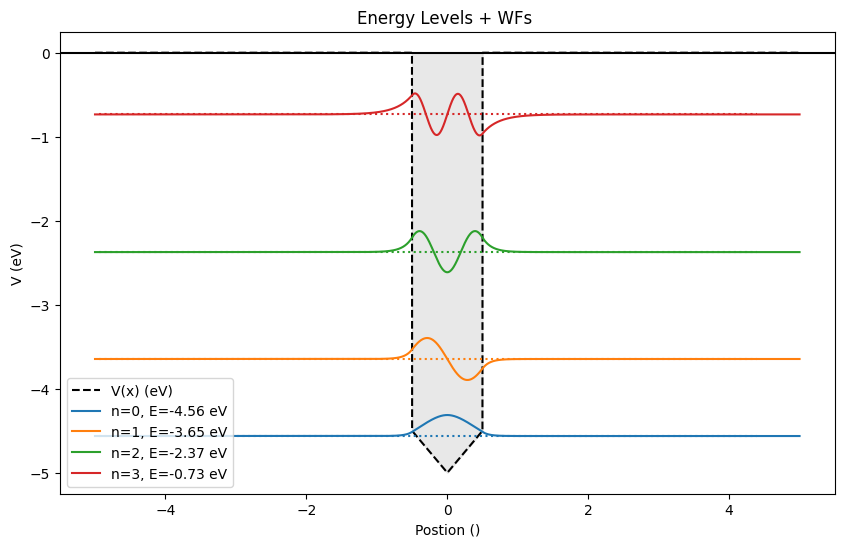

In [46]:
#Uma gravata

r=np.linspace(-5, 5, 5000)
V_Triang = TriangleS(5,-1,r, to_meter=1e-9)
EnergyT, Psi_T, spaceT = Solve_Sch_Eq(0.511, V_Triang, 4)

## Potential for JPsi(2S)

0.635
Time taken: 207.242030 sec


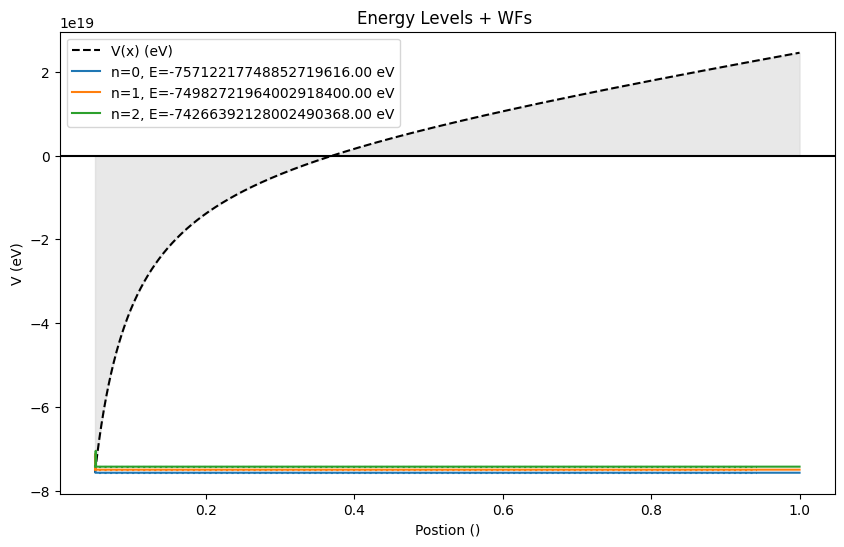

In [50]:
region_jpsi2s=np.linspace(0.0507, 1 ,2000)
reducedsystemmass_jpsi2s = round(Qc_mass/2,3)*(1e-3) #(in GeV)
print(reducedsystemmass_jpsi2s)
V_Cornel=Cornel(region_jpsi2s, to_meter=1)

Energy, Psi_Well, space = Solve_Sch_Eq(reducedsystemmass_jpsi2s, V_Cornel, 3)

# Potential for X(3872)


Time taken: 73.153516 sec


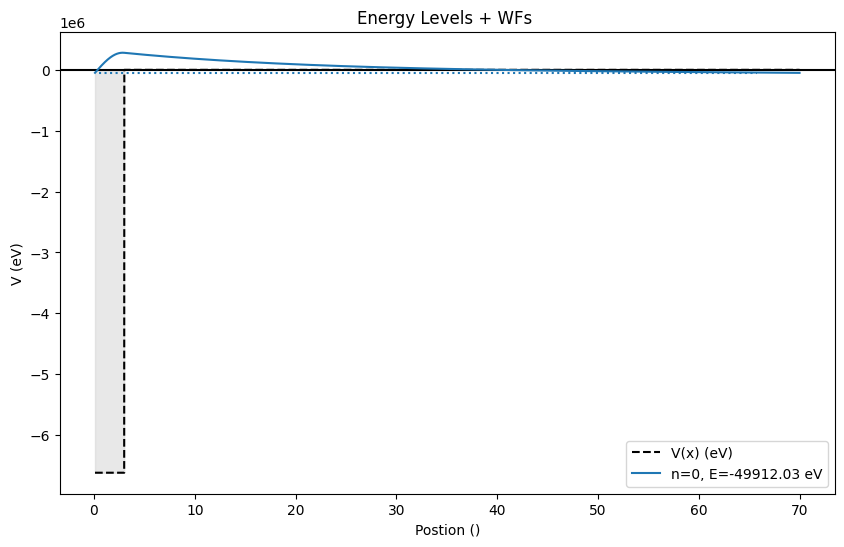

(Binding energy of -0.05 MeV = -50000 eV)


In [34]:
region=np.linspace(0.1, 70, 10000)
V_Well=Well(-6620000, 6.0, region, to_meter=fmto)

Energy, Psi_Well, space = Solve_Sch_Eq(reducedsystemmass, V_Well, 1)
print("(Binding energy of -0.05 MeV = -50000 eV)")

Time taken: 72.822554 sec


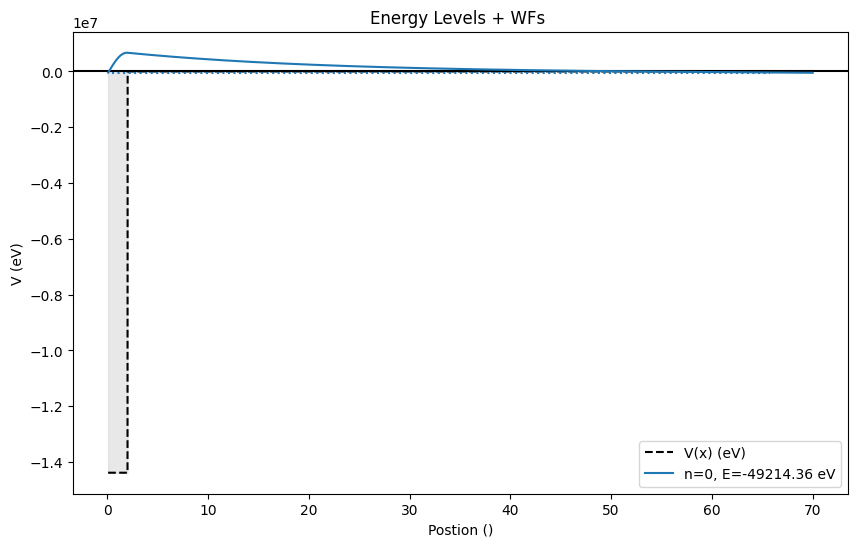

(Binding energy of -0.05 MeV = -50000 eV)


In [42]:
#region=np.linspace(-50, 50, 5000)
V_Well2=Well(-14380000, 4.05, region, to_meter=fmto)

Energy2, Psi_Well2, space2 = Solve_Sch_Eq(reducedsystemmass, V_Well2, 1)
print("(Binding energy of -0.05 MeV = -50000 eV)")

Time taken: 2.469931 sec


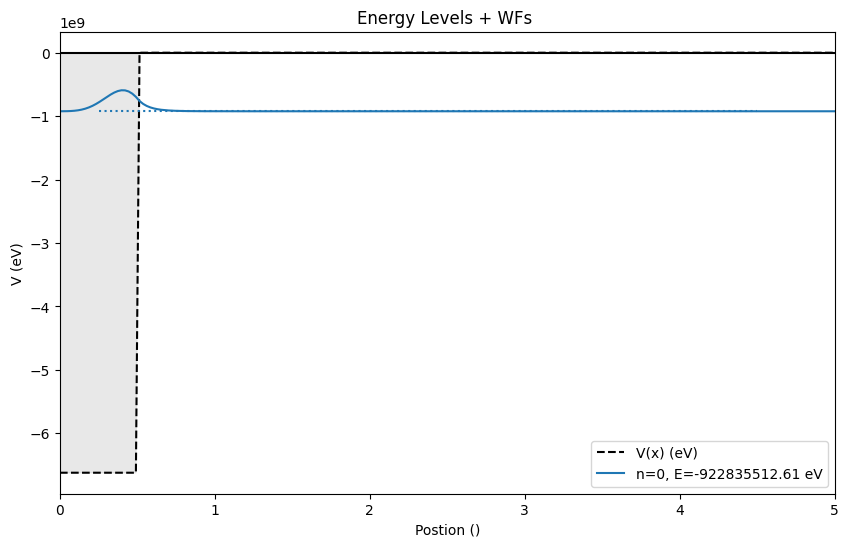

(Binding energy of -0.05 MeV = -50000 eV)


In [91]:
region=np.linspace(0.001, 70, 3000)
V_Well3=Well(-6620000000, 1.0, region, to_meter=fmto)
Energy_W_X, Psi_W_X, space_W_X = Solve_Sch_Eq(reducedsystemmass, V_Well3, 1, coord = "RadiusThetaPhi",  xl=[0,5], ell=0)

print("(Binding energy of -0.05 MeV = -50000 eV)")

Time taken: 10.277051 sec


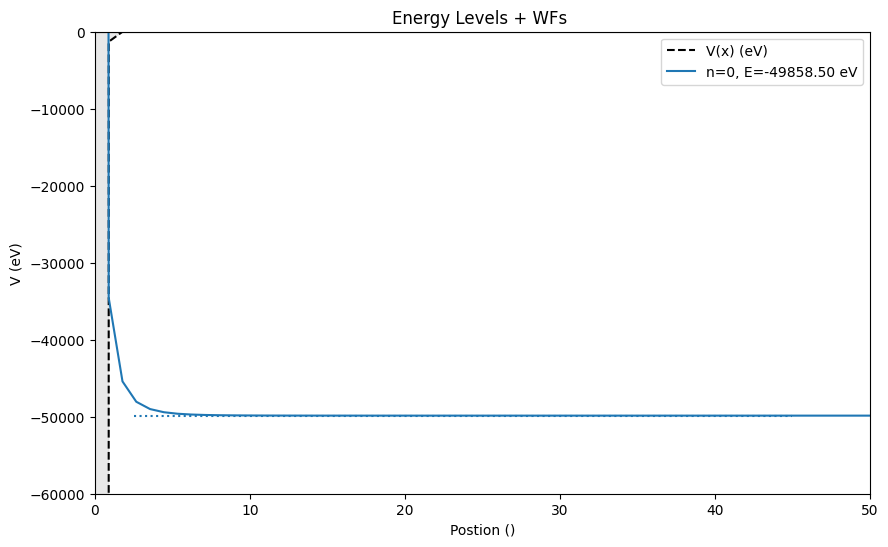

In [23]:
def OnePionExchange(r, to_m = 1, g = 0.59, f_pi= 92.4,  m_pi = 134.977):
    hbar_c = 197.33  # MeV 
    x_m = r * to_m
    r_MeV = x_m * 5.067e+13   #meter_to_MeV = 5.067e+12  

    # One Pion Exchange Potential in MeV
    V_pi_MeV = -(g**2 / (4 * np.pi))  * (np.exp(-m_pi * r_MeV) / r_MeV)

    # Convert potential from MeV to eV (1 MeV = 1e6 eV)
    V_pi_j = V_pi_MeV *1e6 * eV_to_J


    return [x_m, V_pi_j, r]

r = np.linspace(0.01, 4444.5, 5000)  # in fm
V_ope = OnePionExchange(r, to_m = fmto )
Energy_W_X, Psi_W_X, space_W_X = Solve_Sch_Eq(reducedsystemmass, V_ope, 1, coord = "RadiusThetaPhi", yl=[-60000,0],  xl=[0,50], ell=0)


# Analytical Case
## Solving Schrodinger equation for a confining Well potential

We model the potential, $V(x)$, under which X(3872) lives using a well:   

\begin{equation}
V(x) \begin{cases} 
=-v_{0} & \text{for } |x| < l \quad \text{(I)}\\
=0 & \text{elsewhere,} \quad \text{(II) and (III)}  \\
\end{cases}
\end{equation}

with $l$ being the (half) width of the well.

To obtain the WF in position space we solve the time independent Schroedinger equation, $\hat{H}\,|{\Psi}\rangle = E \,|{\Psi}\rangle $, after casting it into position space:

\begin{align}
-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} \Psi(x)& + V(x)\,\Psi(x) = E\,\Psi(x) \Leftrightarrow \\
\frac{\partial^2}{\partial x^2} \Psi(x)& = - \frac{2m}{\hbar^2}\big(E-V(x)\big)\,\Psi(x)
\end{align}

In region $(I)$ (inside the well, $[-l,l]$) we have:

\begin{align}
\frac{\partial^2}{\partial x^2} \Psi_{I}(x)& = - \overbrace{\frac{2m}{\hbar^2}\big(E-(-v_0)\big)}^{=K_I^2}\,\Psi_{I}(x) \Leftrightarrow \\
\frac{\partial^2}{\partial x^2} \Psi_{I}(x)& = - k_I^2\,\Psi_{I}(x)  \\
&\boxed{\Psi_{I}(x) = \mathcal{A}\,sin(K_Ix)+ \mathcal{B}\,cos(K_Ix)}
\end{align}

In region $(II)$ (outside the well, $[l,+\infty]$) we have:

\begin{align}
\frac{\partial^2}{\partial x^2} \Psi_{II}(x)& = + \overbrace{\frac{2m}{\hbar^2}\big(|E|-0\big)}^{=K_{II}^2}\,\Psi_{II}(x) \Leftrightarrow \\
\frac{\partial^2}{\partial x^2} \Psi_{II}(x) & = k_{II}^2\,\Psi_{II}(x)  \\
&\boxed{\Psi_{II}(x) = \mathcal{C}\,e^{-K_{II}x} + \color{red}{\mathcal{G}\,e^{K_{II}x}}}
\end{align}

The term in written in red is to be discarded $(\mathcal{G}=0)$, else the Wave Function diverges in this region as $x\rightarrow + \infty$. Similar steps follow for region $(III)$, where the wave fucntion takes the form $(K_{II}=K_{III})$

\begin{equation}
\boxed{\Psi_{III}(x) = \mathcal{D}\,e^{K_{II}x}}
\end{equation}

The boundary and normalization conditions that the Wave Function must satisfy determine the unkown coeficients

\begin{equation}
\begin{cases} 
\text{(continuity)} & \Psi_I(l) = \Psi_{II}(l)  &\Leftrightarrow \, \mathcal{A} \, sin(k_I \, l) + \mathcal{B} \, cos(k_I \, l) - \mathcal{C}\,e^{-K_{II} \, l} &= 0 \\
\text{(continuity)} & \Psi_I(-l) = \Psi_{III}(-l) &\Leftrightarrow \, \mathcal{A} \, sin(- k_I \, l) + \mathcal{B} \, cos(- k_I \, l) - \mathcal{D}\,e^{-K_{II} \, l} &= 0   \\
\text{(smothness)} & \Psi'_{I}(l) = \Psi'_{II}(l) &\Leftrightarrow \, k_I\,\mathcal{A} \, cos(k_I \, l) - k_I \, \mathcal{B} \, sin(k_I \, l) + k_{II} \, \mathcal{C} e^{-2K_{II} \, l} &= 0 \\
\text{(smothness)} & \Psi'_{I}(-l) = \Psi'_{III}(-l) &\Leftrightarrow \,  k_I\,\mathcal{A} \, cos(- k_I \, l) - k_I \, \mathcal{B} \, sin(- k_I \, l) - k_{II} \, \mathcal{D} e^{-2K_{II} \, l} &= 0 \\
\text{(normalization)} & \int_{-\infty}^{+\infty} \Psi(x) \, dx = 1 &\Leftrightarrow \, \big(\mathcal{A}^2+\mathcal{B}^2 \big)\,l + \frac{\mathcal{C}^2}{2k_{II}} e^{-2K_{II} \, l} + \frac{\mathcal{D}^2}{2k_{II}} e^{-2K_{II} \, l} &= 1  \\
\end{cases}
\end{equation}


From here a transcendent equation for the energy levels follow.


# Apendix A
### Discretization of Sch. equation in cartesian coordinates

In cartisean coordinates, Sch. equation is discretized as follows

\begin{align}
\hat{H}\,|{\Psi}\rangle \,=& \, E \,|{\Psi}\rangle \\
\bigg\downarrow & \quad \text{position space} \\
-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} \Psi(x) \, +& \, V(x)\,\Psi(x) = E\,\Psi(x) \\
\bigg\downarrow & \quad \text{discretization}\\
-\frac{\hbar^2}{2m\Delta x^2}\big(\psi(x_{i+1}) + \psi(x_{i-1})\big) \,+ &\, \left( \frac{\hbar^2}{m\Delta x^2} + V(x_i) \right) \psi(x_i)   = E \psi(x_i),
\end{align}

where $\Delta x$ is the grid spacing and $i$ the $i$-th grid point. In this (1D) discrete form the Hamiltonian can be identified as a matrix, 

\begin{equation}
    \text{Diagonal:} \quad \frac{\hbar^2}{m \Delta x^2} + V(x_i), \quad \text{Off-diagonal:} \quad -\frac{\hbar^2}{2m \Delta x^2},
\end{equation}

allowing to interpret Schrodinger equation as a matrix equation, and thus there follows an eigenvalue problem: 

\begin{equation}
\begin{bmatrix}
\frac{\hbar^2}{m\Delta x^2} + V(x_1) & -\frac{\hbar^2}{2m\Delta x^2} & 0 & 0 & \cdots \\
-\frac{\hbar^2}{2m\Delta x^2} & \frac{\hbar^2}{m\Delta x^2} + V(x_2) & -\frac{\hbar^2}{2m\Delta x^2} & 0 & \cdots \\
0 & -\frac{\hbar^2}{2m\Delta x^2} & \frac{\hbar^2}{m\Delta x^2} + V(x_3) & -\frac{\hbar^2}{2m\Delta x^2} & \cdots \\
\vdots & \vdots & \vdots & \vdots & \ddots \\
\end{bmatrix} \,
\begin{bmatrix}
\psi(x_1) \\
\psi(x_2) \\
\psi(x_3) \\
\vdots \\
\end{bmatrix} =E
\begin{bmatrix}
\psi(x_1) \\
\psi(x_2) \\
\psi(x_3) \\
\vdots \\
\end{bmatrix}.
\end{equation}


The code in this project has been tested for two well known potentials:  
-> the well potential 

\begin{equation}
V(x) =
\begin{cases} 
-v_{0} & \text{for } |x| < l \\
0 & \text{elsewhere,} \\
\end{cases}
\end{equation}

-> and the harmoinic oscilator, 

\begin{equation}
V(x) = \frac{1}{2}kx^2
\end{equation}

giving correct results upon contrast against literature (see Keneth Krane)  
*provided it is not too crazy